<a href="https://colab.research.google.com/github/maskot1977/ComputerExercises2022/blob/zv3UGDSCDCVn/11%E6%9C%8829%E6%97%A5%E8%AC%9B%E7%BE%A9%E5%88%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第５５章

In [ ]:
import math
def get_num(x, k, L): # 長さ x を決めた時に何本得られるか
    num = 0
    for l in L:
        num += math.floor(l / x)
    return num

In [ ]:
n =  3
k =  2
L =  [7.47, 6.66, 4.11]
get_num(7, k, L)

1

In [ ]:
def q55(k, L):
    lower = 0
    upper = sum(L) / k
    for _ in range(1000):
        mid = (upper + lower)/2
        if get_num(mid, k, L) >= k:
            lower = mid
        else:
            upper = mid
    return math.floor(mid * 100)/100


In [ ]:
n =  3
k =  2
L =  [7.47, 6.66, 4.11]
q55(k, L)

6.66

In [ ]:
n =  4
k =  5
L =  [2.86, 2.69, 2.05, 5.23]
q55(k, L)

2.04

In [ ]:
n =  5
k =  9
L =  [6.33, 3.18, 6.92, 9.38, 8.96]
q55(k, L)

3.16

# 第56章：連立一次方程式

In [ ]:
A = [
    [1, 5, 1, -1],
    [3, 2, 7, 1],
    [4, 1, 3, -2],
    [1, 6, 4, 3]
]
b = [5, 8, 7, 13]

In [ ]:
def q56(A, b):
    for i in range(len(A) - 1):
        for j in range(i + 1, len(A)):
            if i == j:
                coeff = 1
            else:
                coeff = A[j][i] / A[i][i]
            
            for k in range(len(A[j])):
                A[j][k] -= A[i][k] * coeff
            
            b[j] -= b[i] * coeff
    
    for i in range(len(A) - 1, 0, -1):
        b[i] /= A[i][i]
        if k in range(len(A[i])):
            if i == k:
                A[i][k] = 1
            else:
                A[i][k] /= A[i][i]
        
        for j in range(i):
            b[j] -= b[i] * A[j][i]
            A[j][i] = 0

    return A, b

In [ ]:
q56(A, b)

([[1, 0, 0, 0],
  [0.0, -13.0, 0, -0.0],
  [0.0, 0.0, -6.846153846153846, -0.0],
  [0.0, 0.0, 0.0, 1]],
 [3.5, 1.0, -0.9999999999999999, 2.5])

In [ ]:
# バグが取れない

# 第59章：行列計算用ライブラリnumpy

In [ ]:
import numpy as np

A = np.array(
    [[1, 2], [1, -3]]
)
B = np.array(
    [[1, 2], [2, 5]]
)

In [ ]:
A - B

array([[ 0,  0],
       [-1, -8]])

In [ ]:
A @ B

array([[  5,  12],
       [ -5, -13]])

In [ ]:
B @ A

array([[  3,  -4],
       [  7, -11]])

In [ ]:
A.dot(B)

array([[  5,  12],
       [ -5, -13]])

In [ ]:
np.linalg.inv(B)

array([[ 5., -2.],
       [-2.,  1.]])

In [ ]:
A @ np.linalg.inv(B)

array([[ 1.,  0.],
       [11., -5.]])

In [ ]:
C = np.array(
    [[1, -1, -1], [-1, 2, 2], [2, 1, 2]]
)
np.linalg.inv(C)

array([[ 2.00000000e+00,  1.00000000e+00, -3.33066907e-16],
       [ 6.00000000e+00,  4.00000000e+00, -1.00000000e+00],
       [-5.00000000e+00, -3.00000000e+00,  1.00000000e+00]])

In [ ]:
w, v = np.linalg.eig(A)
print("固有値", w, "固有ベクトル", v)

固有値 [ 1.44948974 -3.44948974] 固有ベクトル [[ 0.97566304 -0.40997761]
 [ 0.21927526  0.91209559]]


In [ ]:
w, v = np.linalg.eig(B)
print("固有値", w, "固有ベクトル", v)

固有値 [0.17157288 5.82842712] 固有ベクトル [[-0.92387953 -0.38268343]
 [ 0.38268343 -0.92387953]]


In [ ]:
w, v = np.linalg.eig(C)
print("固有値", w, "固有ベクトル", v)

固有値 [0.16071324+0.j         2.41964338+0.60629073j 2.41964338-0.60629073j] 固有ベクトル [[-0.18175202+0.j         -0.50539199+0.0305654j  -0.50539199-0.0305654j ]
 [-0.76740476+0.j          0.81723109+0.j          0.81723109-0.j        ]
 [ 0.61486269+0.j         -0.08122319+0.26302251j -0.08122319-0.26302251j]]


In [ ]:
A = np.array([
    [3, 2, 7, 1],
    [1, 5, 1, -1],
    [4, 1, 3, -2],
    [1, 6, 4, 3]
])
b = np.array([8, 5, 7, 13])

In [ ]:
np.linalg.solve(A, b)

array([ 3.5,  1. , -1. ,  2.5])

# 第60章：線形計画法ライブラリPuLP

In [ ]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pulp

problem = pulp.LpProblem(name='q60', sense=pulp.LpMinimize)

In [ ]:
a = pulp.LpVariable('a', lowBound = 0)
b = pulp.LpVariable('b', lowBound = 0)
c = pulp.LpVariable('c', lowBound = 0)

In [ ]:
problem += 40 * a + 20 * b + 50 * c

In [ ]:
problem += 3 * a + 1 * b + 2 * c >= 15
problem += 1 * a + 2 * b + 4 * c >= 10

In [ ]:
problem

q60:
MINIMIZE
40*a + 20*b + 50*c + 0
SUBJECT TO
_C1: 3 a + b + 2 c >= 15

_C2: a + 2 b + 4 c >= 10

VARIABLES
a Continuous
b Continuous
c Continuous

In [ ]:
status = problem.solve()

In [ ]:
pulp.LpStatus[status]

'Optimal'

In [ ]:
a.value(), b.value(), c.value()

(4.0, 3.0, 0.0)

In [ ]:
problem.objective.value()

220.0

# 第61章：正規分布

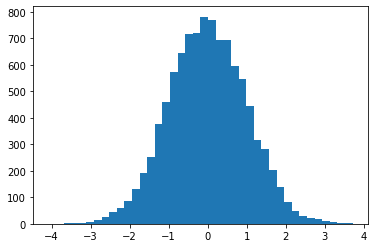

In [ ]:
import random
import matplotlib.pyplot as plt
sample_size = 10000
dist = [random.normalvariate(mu=0, sigma=1) for i in range(sample_size)]
plt.hist(dist, bins=40)
plt.show()

In [ ]:
p = sum([1 for n in dist if n >= 2]) / sample_size
p

0.0213

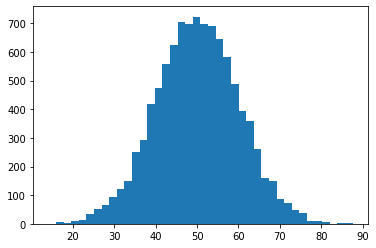

In [ ]:
import random
import matplotlib.pyplot as plt
sample_size = 10000
dist = [random.normalvariate(mu=50, sigma=10) for i in range(sample_size)]
plt.hist(dist, bins=40)
plt.show()

In [ ]:
sum([1 for n in dist if n >= 70]) 

236

# 第62章：二項分布

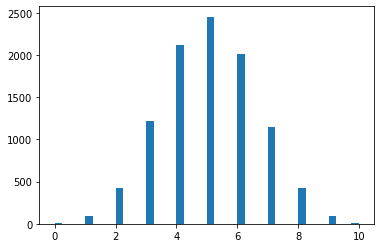

In [ ]:
# 数値計算のライブラリをインポートする。
import numpy as np
import matplotlib.pyplot as plt

sample_size = 10000 # 乱数発生回数

# 確率pで奇数が出る（確率1-pで偶数が出る）ルーレットをn回プレイしたときに、
# 奇数が出る回数の分布
dist = [np.random.binomial(n=10, p=0.5) for i in range(sample_size)]
plt.hist(dist, bins=40)
plt.show()

In [ ]:
p = sum([1 for n in dist if n >= 6]) / sample_size
p

0.368

In [ ]:
dist = [np.random.binomial(n=100, p=0.5) for i in range(sample_size)]
p = sum([1 for n in dist if n >= 60]) / sample_size
p

0.027

In [ ]:
dist = [np.random.binomial(n=10, p=0.5) for i in range(sample_size)]
p = sum([1 for n in dist if n >= 6]) / sample_size
p

0.38

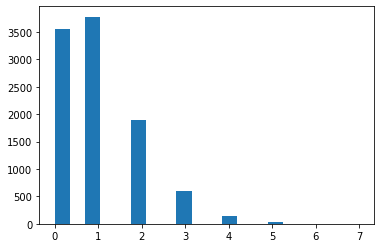

In [ ]:
dist = [np.random.binomial(n=20, p=0.05) for i in range(sample_size)]
plt.hist(dist, bins=20)
plt.show()

In [ ]:
dist = [np.random.binomial(n=100, p=0.05) for i in range(sample_size)]
p = sum([1 for n in dist if n >= 10]) / sample_size
p

0.0264

# 第63章：カイ２乗検定

（修正版）

In [9]:
import scipy as sp # 科学計算ライブラリ
from scipy import stats # 統計計算ライブラリ

significance = 0.05
o = [17, 10, 6, 7, 15, 5] # 分布１（ex.実測値）
e = [10, 10, 10, 10, 10, 10] # 分布２（ex.理論値）

chi2, p, dof, expected = stats.chi2_contingency([o, e]) #, correction=False)

print('chi2 値は %(chi2)s' %locals())
print('確率は %(p)s' %locals())

if p < significance:
    print('有意水準 %(significance)s で、有意な差があります' %locals())
else:
    print('有意水準 %(significance)s で、有意な差がありません' %locals())

chi2 値は 6.010893246187363
確率は 0.30516040107253883
有意水準 0.05 で、有意な差がありません


In [10]:
import scipy as sp # 科学計算ライブラリ
from scipy import stats # 統計計算ライブラリ

significance = 0.05
o = [170, 100, 60, 70, 150, 50] # 分布１（ex.実測値）
e = [10, 10, 10, 10, 10, 10] # 分布２（ex.理論値）

chi2, p, dof, expected = stats.chi2_contingency([o, e]) #, correction=False)

print('chi2 値は %(chi2)s' %locals())
print('確率は %(p)s' %locals())

if p < significance:
    print('有意水準 %(significance)s で、有意な差があります' %locals())
else:
    print('有意水準 %(significance)s で、有意な差がありません' %locals())

chi2 値は 11.862103174603176
確率は 0.03672692783190466
有意水準 0.05 で、有意な差があります


In [11]:
import scipy as sp # 科学計算ライブラリ
from scipy import stats # 統計計算ライブラリ

significance = 0.05
o = [12, 30, 58] # 分布１（ex.実測値）
e = [14, 90, 96] # 分布２（ex.理論値）

chi2, p, dof, expected = stats.chi2_contingency([o, e]) #, correction=False)

print('chi2 値は %(chi2)s' %locals())
print('確率は %(p)s' %locals())

if p < significance:
    print('有意水準 %(significance)s で、有意な差があります' %locals())
else:
    print('有意水準 %(significance)s で、有意な差がありません' %locals())

chi2 値は 6.971778221778222
確率は 0.03062651595138053
有意水準 0.05 で、有意な差があります


# 第64章：t検定

In [ ]:
import scipy as sp # 科学計算ライブラリ
from scipy import stats # 統計計算ライブラリ
# 対応のないt検定
significance = 0.05
X = [68, 75, 80, 71, 73, 79, 69, 65]
Y = [86, 83, 76, 81, 75, 82, 87, 75]

t, p = stats.ttest_ind(X, Y)

print('t 値は %(t)s' %locals())
print('確率は %(p)s' %locals())

if p < significance:
    print('有意水準 %(significance)s で、有意な差があります' %locals())
else:
    print('有意水準 %(significance)s で、有意な差がありません' %locals())

t 値は -3.214043146821967
確率は 0.006243695014300228
有意水準 0.05 で、有意な差があります


In [ ]:
import scipy as sp # 科学計算ライブラリ
from scipy import stats # 統計計算ライブラリ
# 対応のあるt検定
significance = 0.05
X = [68, 75, 80, 71, 73, 79, 69, 65]
Y = [86, 83, 76, 81, 75, 82, 87, 75]

t, p = stats.ttest_rel(X, Y)

print('t 値は %(t)s' %locals())
print('確率は %(p)s' %locals())

if p < significance:
    print('有意水準 %(significance)s で、有意な差があります' %locals())
else:
    print('有意水準 %(significance)s で、有意な差がありません' %locals())

t 値は -2.9923203754253302
確率は 0.02016001617368161
有意水準 0.05 で、有意な差があります


# 第65章：活性化関数とその深層化

In [ ]:
sigmoid = lambda x: 1/(1 + np.exp(-x))
relu = lambda x: np.maximum(0, x)
tanh = lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)) 

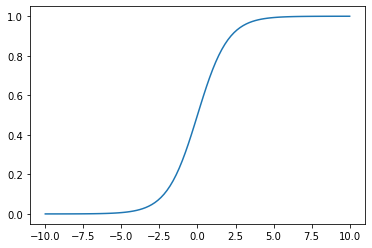

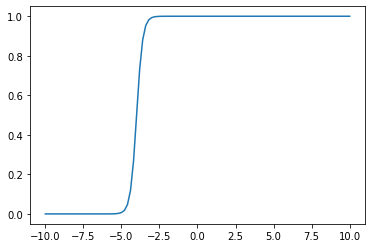

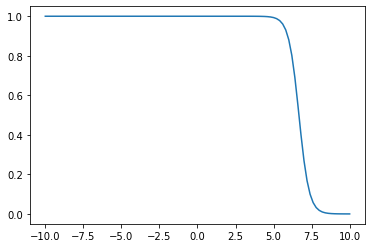

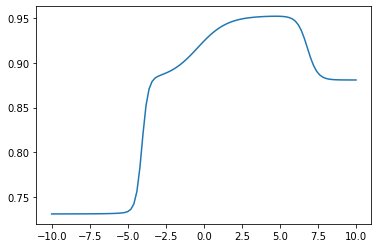

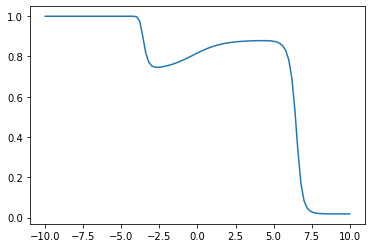

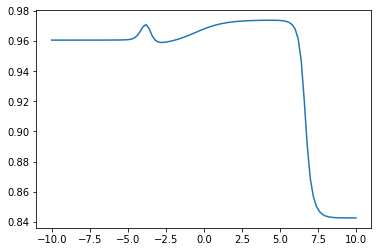

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

activation = sigmoid
f1 = lambda x: activation(x)
f2 = lambda x: activation(5 * x + 20)
f3 = lambda x: activation(-3 * x + 20)
g1 = lambda x: activation(f1(x) + f2(x) + f3(x))
g2 = lambda x: activation(f1(x) - 10 * f2(x) + 6 * f3(x) + 5)
h = lambda x: activation(3 * g1(x) + 2 * g2(x) - 1)
x_observed = np.linspace(-10, 10, 101)

for func in [f1, f2, f3, g1, g2, h]:
    plt.plot(x_observed, func(x_observed))
    plt.show()